In [162]:
#importing libraries
import seaborn as sns 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
#reading dataset
datas=pd.read_csv("Admission_Predict.csv")
df=pd.DataFrame(datas)

In [164]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [165]:
df.shape

(400, 9)

In [166]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [168]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [169]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [170]:
#feature and target
X=df.drop("Chance_of_Admit",axis=1)
x=X.drop("Serial No.",axis=1)
y=df["Chance_of_Admit"]
print(x)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
395        324          110                  3  3.5  3.5  9.04         1
396        325          107                  3  3.0  3.5  9.11         1
397        330          116                  4  5.0  4.5  9.45         1
398        312          103                  3  3.5  4.0  8.78         0
399        333          117                  4  5.0  4.0  9.66         1

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397 

In [171]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


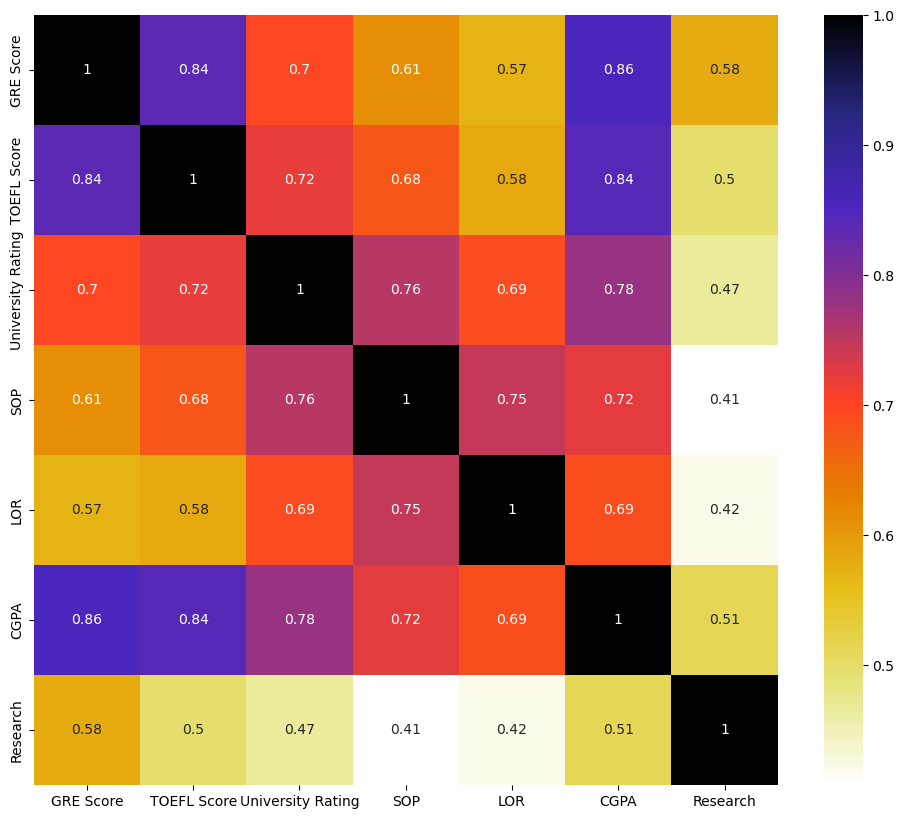

In [172]:
#heatmap to check the correlation
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()


In [173]:
#creating function for feature selection
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
                return col_corr
 
corr_features =correlation(x_train,0.8)
print(len(set(corr_features)))
print(corr_features)

       

1
{'TOEFL Score'}


In [174]:
print(x_train)
print(x_test)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
92         298           98                  2  4.0  3.0  8.03         0
223        308          109                  2  3.0  4.0  8.45         0
234        330          113                  5  5.0  4.0  9.31         1
232        312          107                  2  2.5  3.5  8.27         0
377        290          100                  1  1.5  2.0  7.56         0
..         ...          ...                ...  ...  ...   ...       ...
323        305          102                  2  2.0  2.5  8.18         0
192        322          114                  5  4.5  4.0  8.94         1
117        290          104                  4  2.0  2.5  7.46         0
47         339          119                  5  4.5  4.0  9.70         0
172        322          110                  4  4.0  5.0  9.13         1

[280 rows x 7 columns]
92     0.34
223    0.71
234    0.91
232    0.69
377    0.47
       ... 
323    0.62
192    0.86
117 

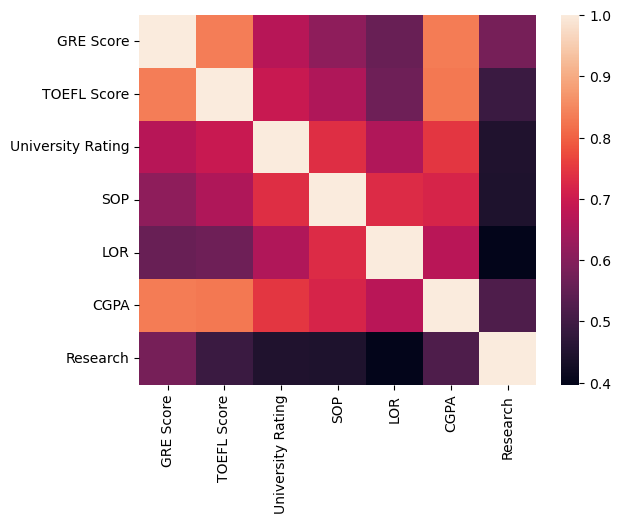

In [177]:
#another way of heatmap
plt.figure()
sns.heatmap(x.corr())
plt.show()


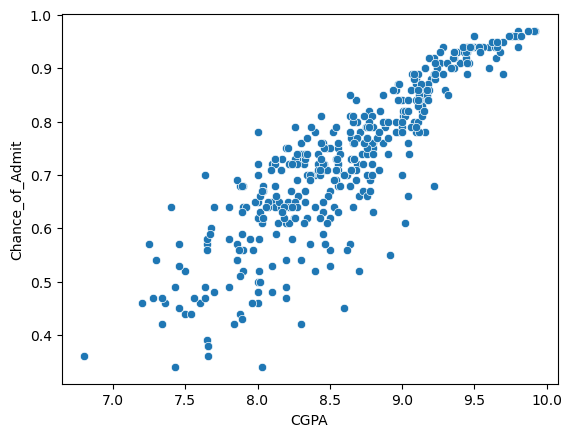

In [176]:
#lets check the linear relationship between cgpa and chance of admit 
plt.figure()
sns.scatterplot(data=df,x="CGPA" ,y="Chance_of_Admit")
plt.show()